# Topic Modelling with LDA

The goal of adopting topic modeling in this project is to explore all the Reddit posts and determine if they can be grouped into defined topics. In other words, we aim to inspect the data for the presence of underlying themes. To achieve this, we adopted Latent Dirichlet Allocation (LDA) for topic modeling. The process was iterative to ensure that the topics were well-defined, with posts in each topic sharing a common theme.
To ensure optimality, we experimented with various combinations of preprocessing techniques and the number of topics. Human visual inspection served as the main evaluation criterion for assessing optimality. Thus, the results from the different combinations were visually inspected to determine if there was an acceptable level of coherence within the words in each topic.


The preprocessing techniques experimented with included different vectorizers, such as the count vectorizer and TF-IDF. For tokenization, we tested unigrams, bigrams, and trigrams. Lemmatization was also considered. Finally, we experimented with different numbers of topics. Initially, the model perplexity score was considered; however, we found that model perplexity could not be deterministic. Therefore, we resorted to manual inspection to assess topic coherence. After experimenting with the combinations of these techniques, it was discerned that the best results came from using the TF-IDF vectorizer on non-lemmatized data with two topics. We decided not to lemmatize the data after realizing that the meaning of some terms was becoming misleading because Reddit is a platform where people use informal language. This decision has some caveats; words such as 'deal' and 'deals' appear as different terms, but the benefits were deemed to exceed the drawbacks. In the TF-IDF vectorizer, terms with over 40% document frequency were excluded, as it was challenging to identify common themes with anything more. Essentially, the strategy was to penalize common terms as much as possible with both TF-IDF and document frequency selection. In addition, certain words such as 'Black Friday', 'www', and '.com' were added to the list of English stopwords because these terms were redundant in this context, as virtually all the posts mentioned 'Black Friday'.

Two topics yielded the most coherence. With more topics, the topic distribution was skewed, with almost 100% of the posts being grouped into just two topics. With two topics, the distribution was more balanced at 47% and 53%. Words like 'online', 'Amazon', 'link', 'code', and 'deal' suggested that the theme of one of the topics was online shopping, possibly indicating people hunting for deals online. Conversely, the theme of the second topic was in-store shopping, with words like 'Walmart', 'store', 'people', 'work', and 'Thanksgiving', possibly reflecting people shopping with their families during the holidays.

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd


In [4]:
#mcl=pd.read_csv('monograms_count_lemmatized 1.csv')
#mco=pd.read_csv('monograms_count_original.csv')
#bcl=pd.read_csv('bigrams_count_lemmatized 1.csv')
#bco=pd.read_csv('bigrams_count_original 1.csv')
#tcl=pd.read_csv('trigrams_count_lemmatized.csv')
#tco=pd.read_csv('trigrams_count_original.csv')
#ocl=pd.read_csv('one_three_grams_count_lemmatized.csv')  
#oco=pd.read_csv('one_three_grams_count_original.csv')
#mctl=pd.read_csv('monograms_count_tfidf_lemmatized.csv')
#mcto=pd.read_csv('monograms_count_tfidf_original.csv')
#bctl=pd.read_csv('bigrams_count_tfidf_lemmatized.csv')
#bcto=pd.read_csv('bigrams_count_tfidf_original.csv')
#octl=pd.read_csv('one_three_grams_count_tfidf_lemmatized.csv')
#octo=pd.read_csv('one_three_grams_count_tfidf_original.csv')
#tctl=pd.read_csv('trigrams_count_tfidf_lemmatized.csv')
#tcto=pd.read_csv('trigrams_count_tfidf_original.csv')
df=pd.read_csv('/Users/Abdul/Downloads/LDA/combined_blackfriday.csv')




In [5]:
df.head()

,score,retrieved_on,subreddit_id,body
0,1,2018-09-03,amazonprime,mini sale day like black friday cyber monday g...
1,1,2018-09-05,amazonprime,pretty sure like black friday liquidation sale...
2,3,2018-09-18,amazonprime,prime times amazon offered one day discount to...
3,2,2018-09-23,amazonprime,black friday probably
4,2,2018-09-23,amazonprime,cyber monday prime day also amazon amazing dea...


In [6]:
# Adding useless words to the preexisting list of stop words
my_stop_words=list(text.ENGLISH_STOP_WORDS.union(['black','friday','black friday','https www','black fridays','fridays','blackfriday','com','http', 'https','www']))


cv=CountVectorizer(max_df=0.40, min_df=2, stop_words=my_stop_words, ngram_range=(1,3))
tfidf=TfidfVectorizer(max_df=0.40, min_df=2, stop_words=my_stop_words, ngram_range=(1,3))

In [7]:
dtm = cv.fit_transform(df["body"])


In [8]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)

#We train the model.
lda.fit(dtm)

len(cv.get_feature_names_out())

len(lda.components_[0])

#print the top 15 words in each topic
n = 15

for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-n:]])
    
topic_results = lda.transform(dtm)

print(topic_results[0].round(2))

The top 15 words for topic #0
['really', 'sales', 'hours', 'think', 'going', 'thanksgiving', 'got', 'walmart', 'work', 'day', 'time', 'year', 'people', 'like', 'store']
The top 15 words for topic #1
['best buy', 'online', 'thanks', 'amazon', 'know', 'looking', 'amp', 'sale', 'tv', 'buy', 'best', 'good', 'deal', 'price', 'deals']
The top 15 words for topic #2
['gift', 'need', 'customer', 'know', 'work', 'time', 'days', 'make', 'use', 'people', 'card', 'buy', 'tv', 'day', 'like']
[0.01 0.35 0.64]


## Training the Final Model using TF-IDF vectorized data

In [9]:
dtm2= tfidf.fit_transform(df["body"])


In [10]:

lda = LatentDirichletAllocation(n_components=2, random_state=42)

#We train the model.
lda.fit(dtm2)

len(tfidf.get_feature_names_out())

len(lda.components_[0])

#print the top 15 words in each topic
n = 15

for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-n:]])
    
topic_results = lda.transform(dtm2)

print(topic_results[0].round(2))

The top 15 words for topic #0
['buy', 'thanksgiving', 'going', 'think', 'good', 'walmart', 'got', 'tv', 'time', 'work', 'day', 'people', 'year', 'store', 'like']
The top 15 words for topic #1
['online', 'card', 'amp', 'code', 'know', 'amazon', 'sale', 'good', 'buy', 'best', 'thanks', 'looking', 'price', 'deals', 'deal']
[0.47 0.53]


In [11]:
print(f'Model Perplexity:', lda.perplexity(dtm2))
print(f'Model Score:', lda.score(dtm2))

Model Perplexity: 51660.45554139166
Model Score: -1947762.4918568572


In [12]:

import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

pyLDAvis.enable_notebook()
lda_display = pyLDAvis.lda_model.prepare(lda, dtm2, tfidf, sort_topics=False)
pyLDAvis.display(lda_display)
# display  via html




In [13]:
for topic_idx in range(lda.n_components):
    df[f'Topic_{topic_idx}_Prob'] = topic_results[:, topic_idx]

In [14]:
df["Topic"] = topic_results.argmax(axis=1)

In [15]:
df = df.rename(columns={
    'Topic_1_Prob': 'online_shopping_prob',
    'Topic_0_Prob': 'in_store_shopping_prob'
})


In [16]:
df.shape

(49309, 7)

In [17]:
df['Topic'] = df.apply(lambda x: 'online_shopping' if x['Topic'] == 1 else 'in_store_shopping', axis=1)

df.head()

,score,retrieved_on,subreddit_id,body,in_store_shopping_prob,online_shopping_prob,Topic
0,1,2018-09-03,amazonprime,mini sale day like black friday cyber monday g...,0.465065,0.534935,online_shopping
1,1,2018-09-05,amazonprime,pretty sure like black friday liquidation sale...,0.889879,0.110121,in_store_shopping
2,3,2018-09-18,amazonprime,prime times amazon offered one day discount to...,0.733637,0.266363,in_store_shopping
3,2,2018-09-23,amazonprime,black friday probably,0.714091,0.285909,in_store_shopping
4,2,2018-09-23,amazonprime,cyber monday prime day also amazon amazing dea...,0.176394,0.823606,online_shopping


Topic #0:


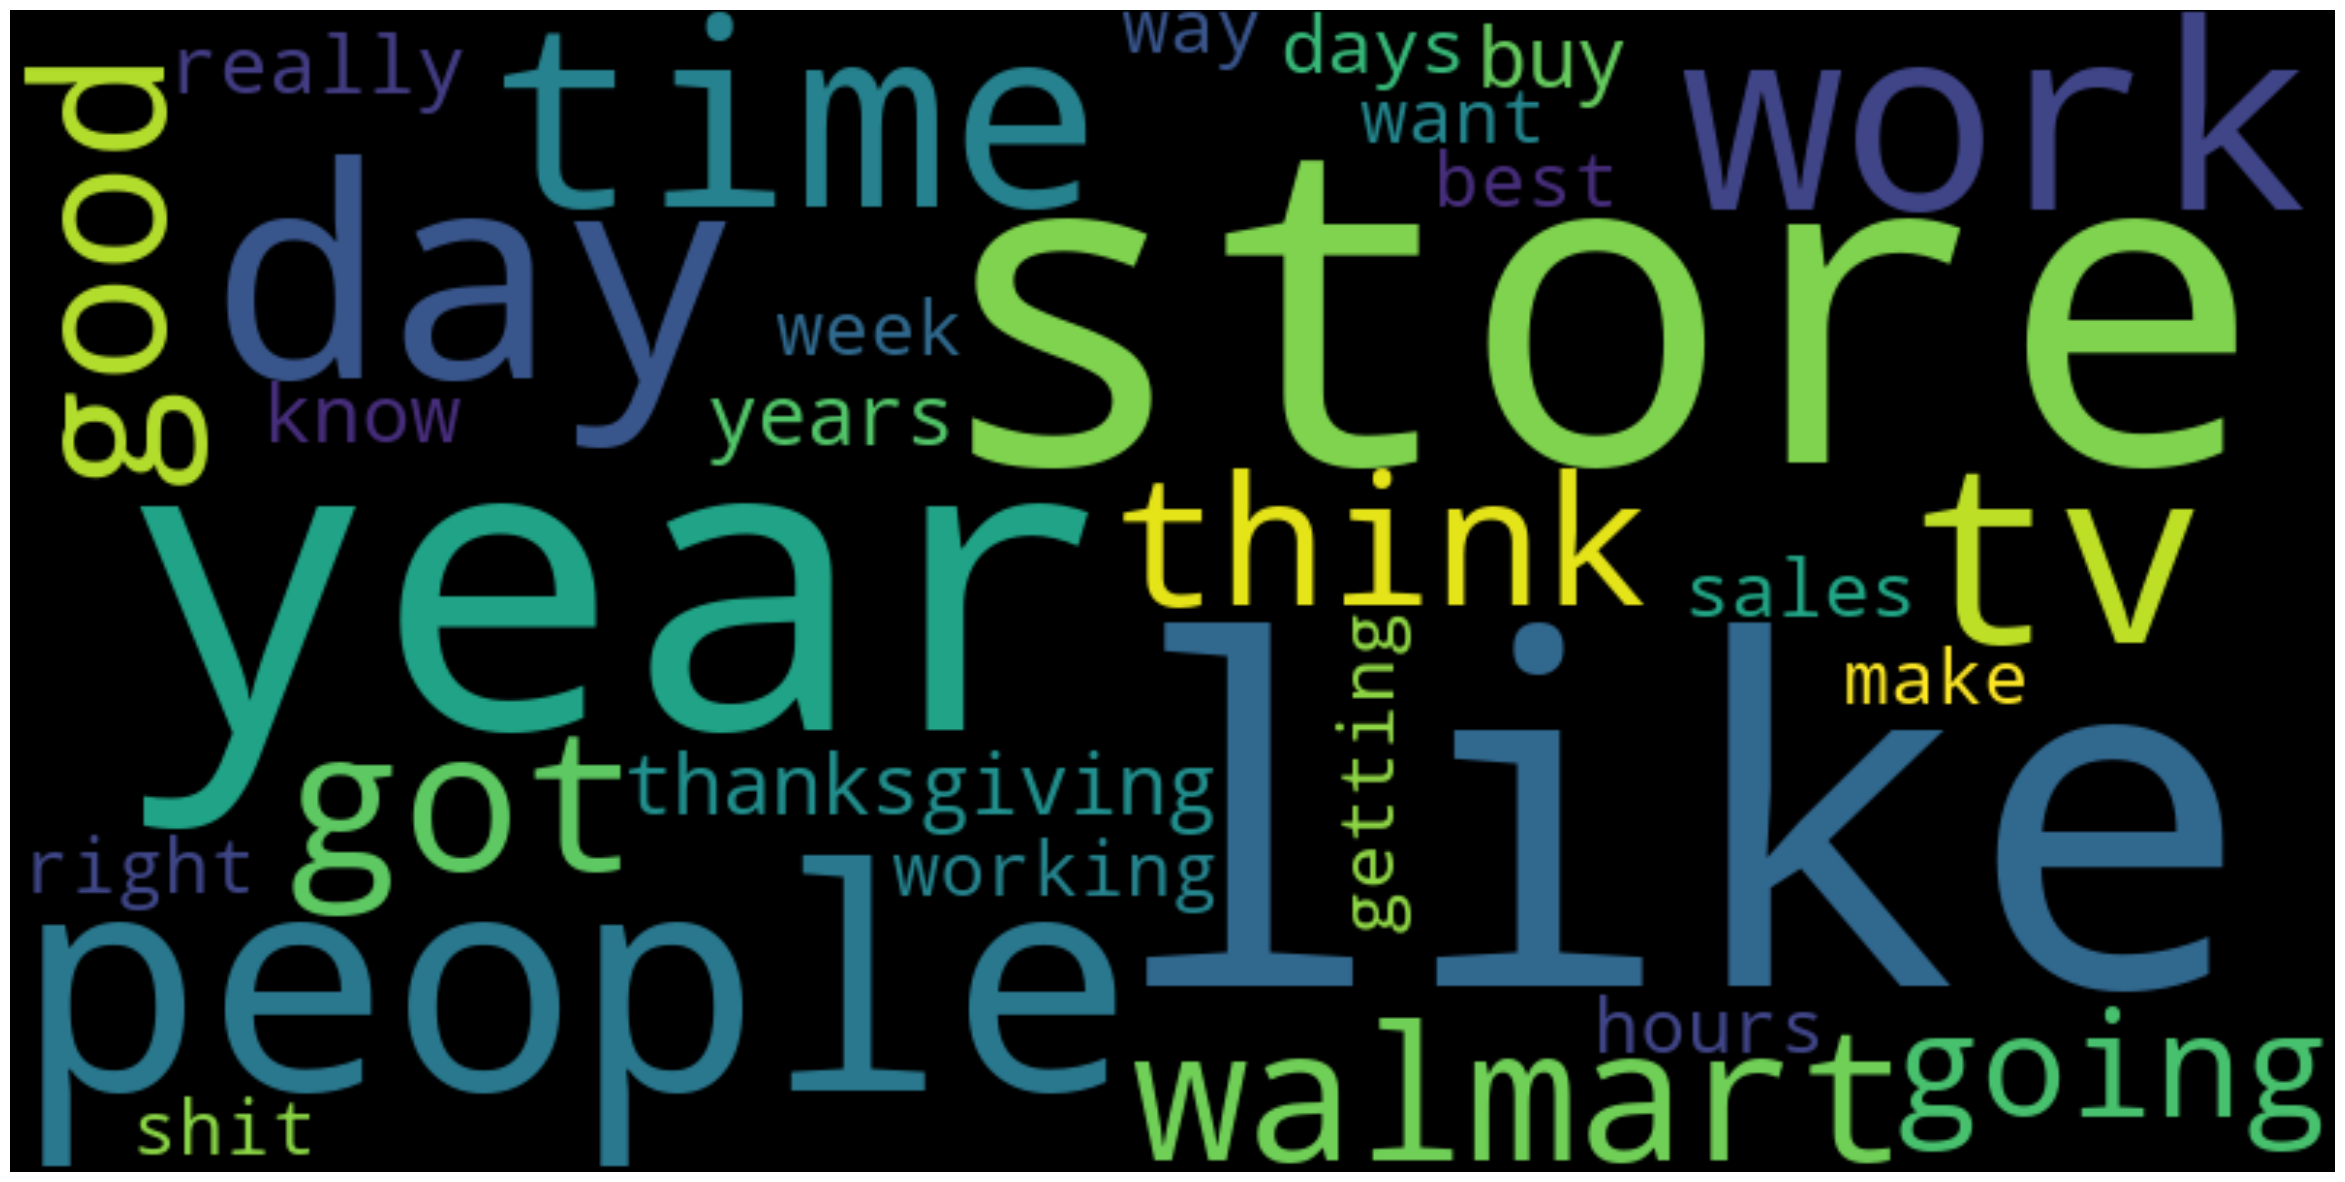

Topic #1:


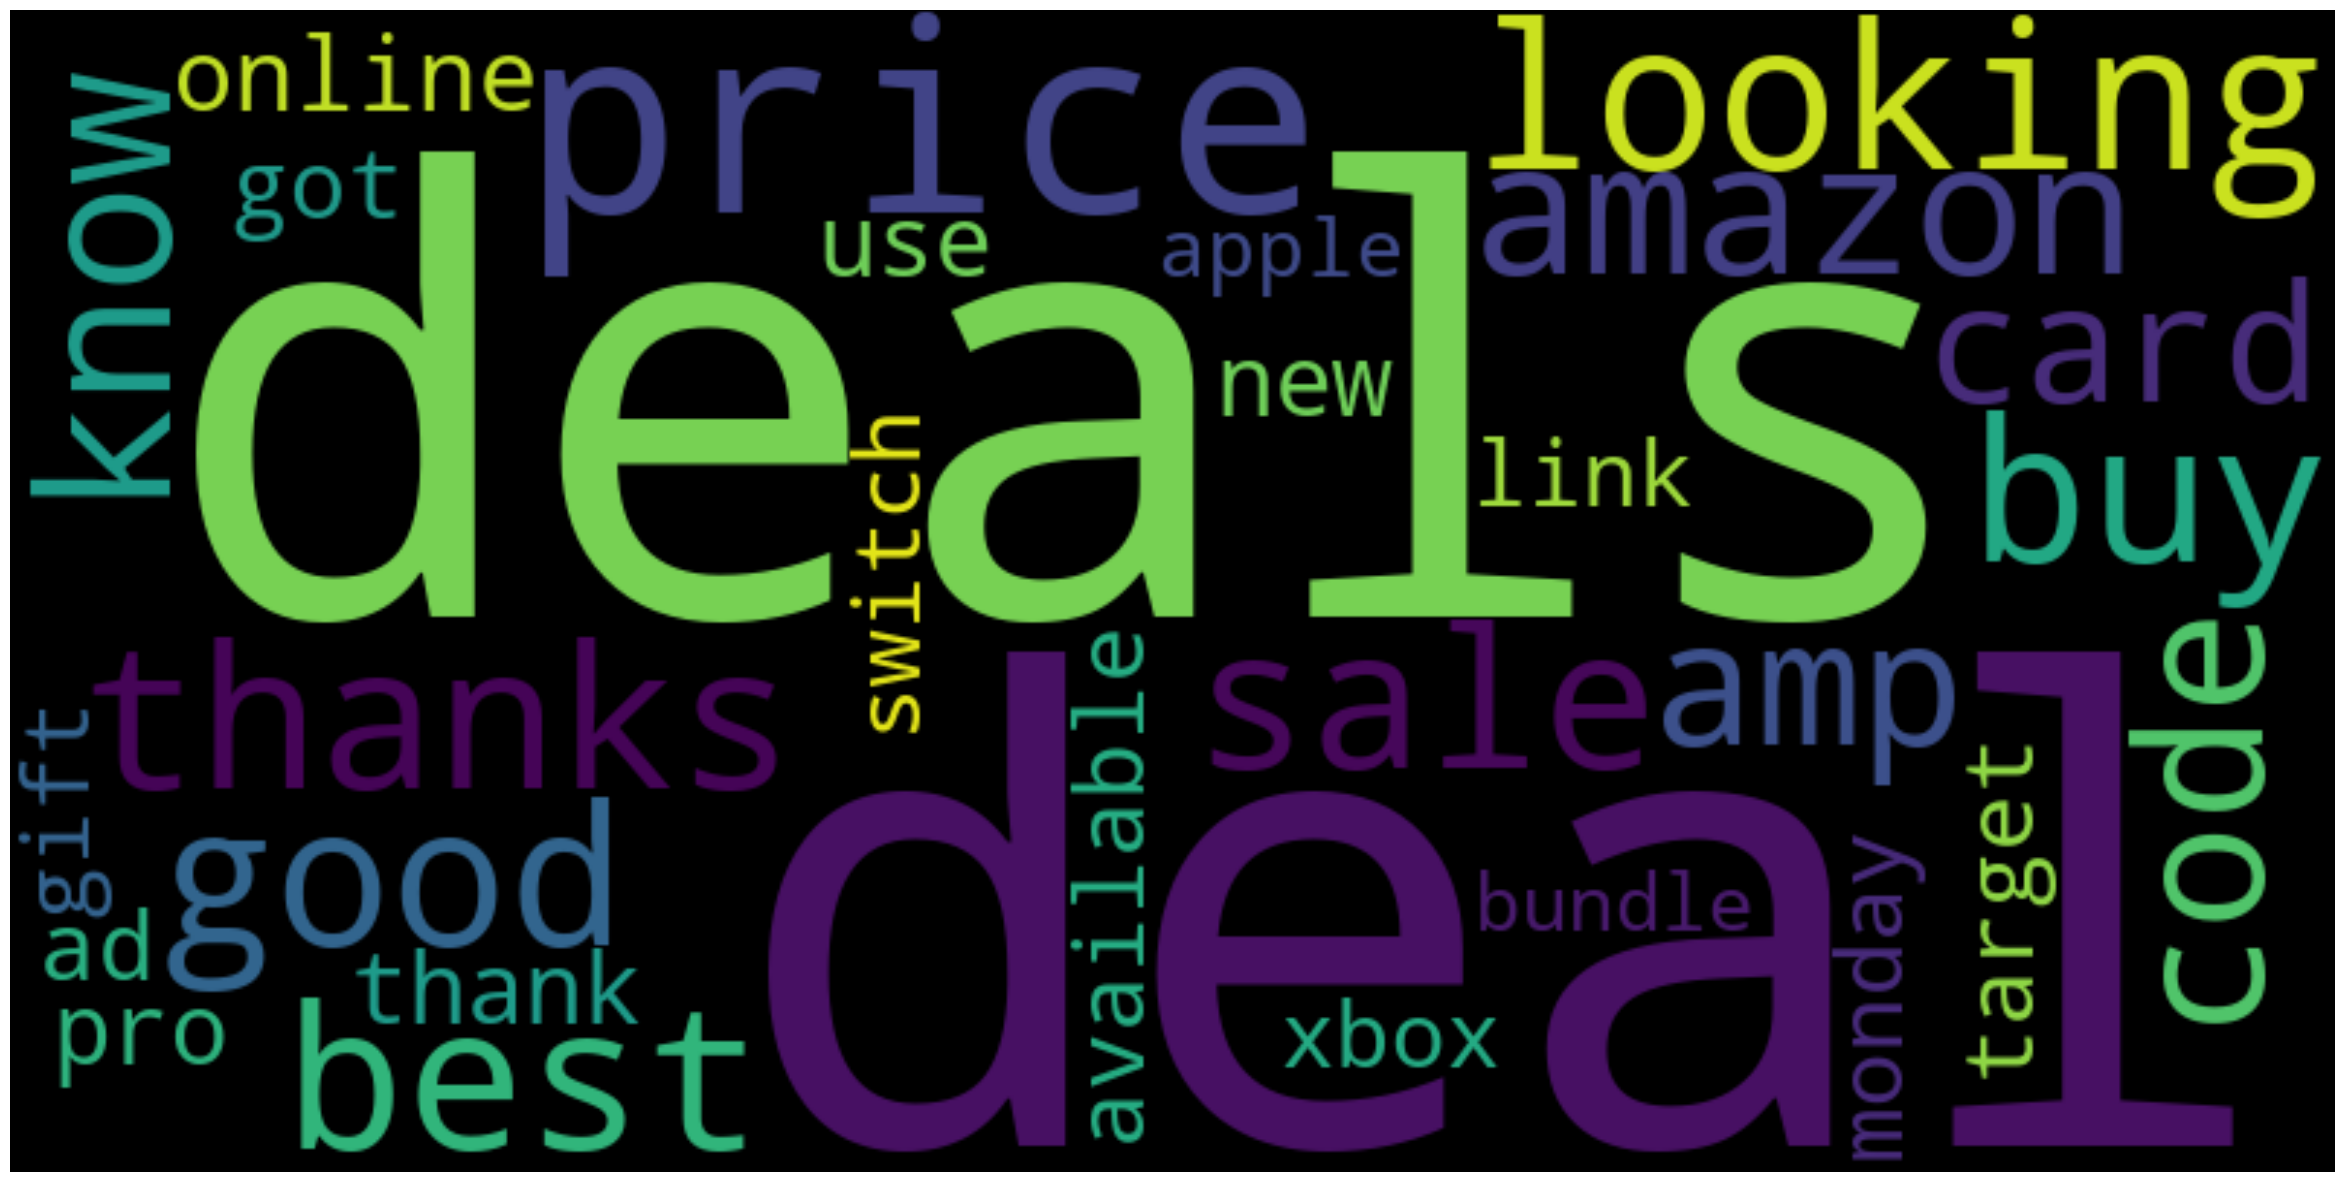

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming `lda` is your trained LDA model and `vectorizer` is the CountVectorizer/TfidfVectorizer used
feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    # Generate a word cloud for the top words in the topic
    words = {feature_names[i]: topic[i] for i in topic.argsort()[:-31:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color ='black').generate_from_frequencies(words)
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [ ]:
df.to_csv('/Users/Abdul/Downloads/LDA/blackfriday_topics.csv', index=True)

## Tried the following methods (adopting different datasets that are preprocessed differently) before deciding to adopt the above method.

In [3]:
mcl.head()

,score,subreddit_id,var_year,aa,aaa,aafes,abandon,ability,able,absence,...,yrs,yup,z,zelda,zero,zip,zombie,zone,zoo,zoom
0,1,amazonprime,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,amazonprime,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,amazonprime,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,amazonprime,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,amazonprime,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mcl.shape

(49309, 5003)

In [5]:
 # Defining functions to drop columns that are not needed for the LDA model
def remove_vars(df):
    df.drop(['score', 'subreddit_id', 'var_year'], axis=1, inplace=True)
    return df
remove_vars(mcl)

,aa,aaa,aafes,abandon,ability,able,absence,absolute,absolutely,absurd,...,yrs,yup,z,zelda,zero,zip,zombie,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49306,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
49307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Determing the optimal number of topics for the LDA model using the monograms count vectorized and lemmatized data
n_comps = [2, 3, 4]
for n in n_comps:
    lda = LatentDirichletAllocation(n_components=n, random_state=42)
    lda.fit(mcl)
    print(f'Model Perplexity for {n} topics:', lda.perplexity(mcl))
    print(f'Model Score for {n} topics:', lda.score(mcl))
    w = 15

    feature_names = mcl.columns
    for index, topic in enumerate(lda.components_):
        top_indices = topic.argsort()[-w:]  
        print(f'The top {w} words for topic #{index}')
        print([feature_names[i] for i in top_indices])

    topic_results = lda.transform(mcl)
    print(topic_results[0].round(2))


Model Perplexity for 2 topics: 993.0427241186022
Model Score for 2 topics: -5650174.075958535
The top 15 words for topic #0
['would', 'make', 'say', 'people', 'time', 'one', 'like', 'year', 'day', 'work', 'go', 'store', 'get', 'black', 'friday']
The top 15 words for topic #1
['sale', 'www', 'one', 'best', 'look', 'http', 'good', 'game', 'get', 'amp', 'tv', 'buy', 'price', 'com', 'deal']
[0.19 0.81]
Model Perplexity for 3 topics: 987.9586856054823
Model Score for 3 topics: -5645971.466441787
The top 15 words for topic #0
['customer', 'make', 'say', 'one', 'year', 'like', 'time', 'people', 'go', 'day', 'work', 'store', 'get', 'black', 'friday']
The top 15 words for topic #1
['us', 'friday', 'code', 'cyber', 'black', 'monday', 'use', 'https', 'game', 'deal', 'amazon', 'www', 'amp', 'http', 'com']
The top 15 words for topic #2
['see', 'black', 'like', 'year', 'sale', 'go', 'look', 'best', 'good', 'one', 'price', 'get', 'tv', 'buy', 'deal']
[0.14 0.73 0.14]
Model Perplexity for 4 topics: 99

In [10]:
# Removing the columns that are not needed for the LDA model
remove_vars(mco)

# Building the LDA model using the monograms count vectorized data
feature_names_mco = mco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mco)
print(f'Model Perplexity:', lda.perplexity(mco))
print(f'Model Score:', lda.score(mco))
w = 15

feature_names = mco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mco[i] for i in top_indices])

topic_results_mco = lda.transform(mco)

print(topic_results_mco[0].round(2))

Model Perplexity: 1254.8027789165035
Model Score: -5683122.178384888
The top 15 words for topic #0
['year', 'know', 'looking', 'would', 'got', 'deals', 'like', 'price', 'best', 'good', 'deal', 'tv', 'buy', 'get', 'one']
[0.21 0.63 0.16]
The top 15 words for topic #1
['us', 'game', 'walmart', 'price', 'cyber', 'monday', 'amazon', 'deal', 'deals', 'friday', 'black', 'www', 'amp', 'https', 'com']
[0.21 0.63 0.16]
The top 15 words for topic #2
['back', 'thanksgiving', 'even', 'would', 'year', 'one', 'work', 'time', 'like', 'day', 'get', 'people', 'store', 'black', 'friday']
[0.21 0.63 0.16]


In [13]:
# Removing the columns that are not needed for the LDA model
remove_vars(bcl)

# Building the LDA model using the bigrams count vectorized and lemmatized data
feature_names_bcl = bcl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bcl)
print(f'Model Perplexity:', lda.perplexity(bcl))
print(f'Model Score:', lda.score(bcl))
w = 15

feature_names = bcl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mco[i] for i in top_indices])

topic_results_mco = lda.transform(bcl)

print(topic_results_mco[0].round(2))

Model Perplexity: 2096.0571325438855
Model Score: -1564283.7329879536
The top 15 words for topic #0
['wii', 'cares', 'serious', 'information', 'hurt', 'alternatives', 'tied', 'purchases', 'fact', 'capitalist', 'hurting', 'punch', 'license', 'funds', 'humanity']
[0.33 0.25 0.42]
The top 15 words for topic #1
['work', 'wiki', 'carrier', 'restocked', 'within', 'jealous', 'bags', 'barnes', 'applies', 'ground', 'fly', 'humanity', 'pops', 'gsm', 'badly']
[0.33 0.25 0.42]
The top 15 words for topic #2
['entrance', 'cashier', 'client', 'keywords', 'earbuds', 'transit', 'east', 'vinyl', 'stage', 'equipment', 'badly', 'jealous', 'earn', 'classes', 'beach']
[0.33 0.25 0.42]


In [15]:
# removing the columns that are not needed for the LDA model
remove_vars(bco)

# Building the LDA model using the bigrams count vectorized data
feature_names_bco = bco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bco)
print(f'Model Perplexity:', lda.perplexity(bco))
print(f'Model Score:', lda.score(bco))
w = 15

feature_names = bco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bco[i] for i in top_indices])

topic_results_bco = lda.transform(bco)
print(topic_results_bco[0].round(2))

Model Perplexity: 1830.2481242878591
Model Score: -1295600.2620539884
The top 15 words for topic #0
['friday deal', 'get one', 'good deals', 'steam key', 'key ref', 'us gamesplanet', 'gamesplanet com', 'ref deal', 'com game', 'friday cyber', 'https us', 'looks like', 'good deal', 'black friday', 'cyber monday']
[0.51 0.14 0.35]
The top 15 words for topic #1
['feel like', 'good luck', 'every year', 'price match', 'friday event', 'like black', 'friday sale', 'friday sales', 'thanksgiving black', 'years ago', 'best buy', 'friday deals', 'gon na', 'last year', 'black friday']
[0.51 0.14 0.35]
The top 15 words for topic #2
['seems like', 'com site', 'www bestbuy', 'www amazon', 'best deal', 'com r', 'xbox one', 'walmart com', 'amazon com', 'reddit com', 'bestbuy com', 'anyone know', 'gift card', 'best buy', 'https www']
[0.51 0.14 0.35]


In [17]:
# Removing the columns that are not needed for the LDA model
remove_vars(tcl)

# Building the LDA model using the trigrams count vectorized and lemmatized data
feature_names_tcl = tcl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tcl)
print(f'Model Perplexity:', lda.perplexity(tcl))
print(f'Model Score:', lda.score(tcl))
w = 15

feature_names = tcl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tcl[i] for i in top_indices])

topic_results_tcl = lda.transform(tcl)

print(topic_results_tcl[0].round(2))

Model Perplexity: 2494.9959238145684
Model Score: -545360.6163885145
The top 15 words for topic #0
['black friday ad', 'www bfads net', 'black friday christmas', 'http www walmart', 'walmart com ip', 'www walmart com', 'steam key ref', 'https us gamesplanet', 'key ref deal', 'like black friday', 'gamesplanet com game', 'us gamesplanet com', 'black friday event', 'work black friday', 'thanksgiving black friday']
The top 15 words for topic #1
['open black friday', 'come black friday', 'buy black friday', 'black friday store', 'match black friday', 'last black friday', 'np reddit com', 'http www reddit', 'www reddit com', 'http www bestbuy', 'black friday deal', 'bestbuy com site', 'www bestbuy com', 'reddit com r', 'black friday sale']
The top 15 words for topic #2
['go black friday', 'black friday weekend', 'first black friday', 'black friday year', 'black friday week', 'black friday price', 'day black friday', 'sale black friday', 'week black friday', 'year black friday', 'http www ama

In [19]:
# Removing the columns that are not needed for the LDA model
remove_vars(tco)

# Building the LDA model using the trigrams count vectorized data
feature_names_tco = tco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tco)
print(f'Model Perplexity:', lda.perplexity(tco))
print(f'Model Score:', lda.score(tco))
w = 15

feature_names = tco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tco[i] for i in top_indices])

topic_results_tco = lda.transform(tco)

print(topic_results_tco[0].round(2))

Model Perplexity: 2507.5040900707377
Model Score: -504946.0347985051
The top 15 words for topic #0
['np reddit com', 'sale black friday', 'bfads net item', 'bestbuy com site', 'black friday christmas', 'www bestbuy com', 'https www bestbuy', 'work black friday', 'day black friday', 'https www bfads', 'www bfads net', 'www amazon com', 'https www amazon', 'thanksgiving black friday', 'black friday sale']
[0.37 0.31 0.32]
The top 15 words for topic #1
['bestbuy com uhd', 'uhd blu ray', 'get black friday', 'black friday one', 'blu ray digital', 'black friday last', 'thanksgiving black friday', 'xbox one x', 'buy black friday', 'store black friday', 'year black friday', 'week black friday', 'black friday sales', 'friday cyber monday', 'black friday cyber']
[0.37 0.31 0.32]
The top 15 words for topic #2
['https www reddit', 'reddit com r', 'black friday weekend', 'black friday event', 'black friday deal', 'walmart com ip', 'https www walmart', 'www walmart com', 'steam key ref', 'key ref de

In [21]:
# Removing the columns that are not needed for the LDA model

remove_vars(ocl)

# Building the LDA model using the one to three grams count vectorized and lemmatized data
feature_names_ocl = ocl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(ocl)
print(f'Model Perplexity:', lda.perplexity(ocl))
print(f'Model Score:', lda.score(ocl))
w = 15

feature_names = ocl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_ocl[i] for i in top_indices])

topic_results_ocl = lda.transform(ocl)

print(topic_results_ocl[0].round(2))

Model Perplexity: 1245.7511651065645
Model Score: -6835045.767243609
The top 15 words for topic #0
['buy', 'last', 'price', 'week', 'thanksgiving', 'work', 'go', 'sale', 'get', 'year', 'day', 'store', 'black friday', 'black', 'friday']
[0.34 0.04 0.62]
The top 15 words for topic #1
['need', 'take', 'want', 'know', 'would', 'use', 'say', 'make', 'time', 'people', 'one', 'work', 'like', 'go', 'get']
[0.34 0.04 0.62]
The top 15 words for topic #2
['http www', 'www', 'amp', 'get', 'look', 'best', 'one', 'price', 'good', 'http', 'game', 'buy', 'tv', 'com', 'deal']
[0.34 0.04 0.62]


In [23]:
# Removing the columns that are not needed for the LDA model
remove_vars(oco)

# Building the LDA model using the one to three grams count vectorized data
feature_names_oco = oco.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(oco)
print(f'Model Perplexity:', lda.perplexity(oco))
print(f'Model Score:', lda.score(oco))
w = 15

feature_names = oco.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_oco[i] for i in top_indices])

topic_results_oco = lda.transform(oco)

print(topic_results_oco[0].round(2))

Model Perplexity: 1438.3184650251571
Model Score: -6567760.290973077
The top 15 words for topic #0
['go', 'make', 'know', 'back', 'us', 'day', 'even', 'would', 'work', 'one', 'time', 'store', 'like', 'get', 'people']
[0.08 0.39 0.53]
The top 15 words for topic #1
['get', 'sales', 'buy', 'deals', 'walmart', 'price', 'store', 'sale', 'day', 'thanksgiving', 'last', 'year', 'black friday', 'black', 'friday']
[0.08 0.39 0.53]
The top 15 words for topic #2
['looking', 'https www', 'www', 'price', 'deals', 'best', 'buy', 'get', 'amp', 'good', 'https', 'one', 'deal', 'tv', 'com']
[0.08 0.39 0.53]


In [25]:
# Removing the columns that are not needed for the LDA model
remove_vars(mctl)

# Building the LDA model using the monograms tf_idf vectorized and lemmatized data
feature_names_mctl = mctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mctl)
print(f'Model Perplexity:', lda.perplexity(mctl))
print(f'Model Score:', lda.score(mctl))
w = 15

feature_names = mctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mctl[i] for i in top_indices])

topic_results_mctl = lda.transform(mctl)

print(topic_results_mctl[0].round(2))

Model Perplexity: 2340.8810725609956
Model Score: -1209045.697930403
The top 15 words for topic #0
['look', 'sale', 'post', 'pro', 'best', 'ad', 'buy', 'card', 'www', 'amazon', 'amp', 'price', 'http', 'com', 'deal']
[0.82 0.09 0.09]
The top 15 words for topic #1
['thanksgiving', 'week', 'one', 'sale', 'like', 'time', 'people', 'go', 'year', 'work', 'day', 'get', 'store', 'black', 'friday']
[0.82 0.09 0.09]
The top 15 words for topic #2
['switch', 'use', 'order', 'price', 'code', 'best', 'thanks', 'game', 'look', 'buy', 'good', 'one', 'deal', 'get', 'tv']
[0.82 0.09 0.09]


In [27]:
# Removing the columns that are not needed for the LDA model
removed_columns = mcto[['score', 'subreddit_id', 'var_year']].copy()
remove_vars(mcto)

# Building the LDA model using the monograms tf_idf vectorized data
feature_names_mcto = mcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(mcto)
print(f'Model Perplexity:', lda.perplexity(mcto))
print(f'Model Score:', lda.score(mcto))
w = 15

feature_names = mcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_mcto[i] for i in top_indices])

topic_results_mcto = lda.transform(mcto)

print(topic_results_mcto[0].round(2))

for topic_idx in range(lda.n_components):
    mcto[f'Topic_{topic_idx}_Prob'] = topic_results_mcto[:, topic_idx]

# Print the first few rows to verify the new columns
print(mcto.head())
# Rejoin the removed columns to the main DataFrame
mcto = mcto.merge(removed_columns, left_index=True, right_index=True, how='left')
mcto.to_csv('mcto_with_topic_probabilities.csv', index=True)


Model Perplexity: 2874.677738219429
Model Score: -1244365.8072237691
The top 15 words for topic #0
['thank', 'know', 'great', 'get', 'anyone', 'price', 'buy', 'looking', 'one', 'thanks', 'best', 'good', 'deals', 'tv', 'deal']
[0.15 0.54 0.31]
The top 15 words for topic #1
['see', 'account', 'site', 'like', 'got', 'link', 'use', 'one', 'free', 'get', 'code', 'www', 'amp', 'https', 'com']
[0.15 0.54 0.31]
The top 15 words for topic #2
['online', 'week', 'one', 'last', 'thanksgiving', 'work', 'people', 'like', 'time', 'year', 'get', 'day', 'store', 'black', 'friday']
[0.15 0.54 0.31]


In [31]:
# Removing the columns that are not needed for the LDA model
remove_vars(bctl)
bctl.dropna(inplace=True)

# Building the LDA model using the bigrams tf_idf vectorized and lemmatized data
feature_names_bctl = bctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bctl)
print(f'Model Perplexity:', lda.perplexity(bctl))
print(f'Model Score:', lda.score(bctl))
w = 15

feature_names = bctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bctl[i] for i in top_indices])

topic_results_bctl = lda.transform(bctl)

print(topic_results_bctl[0].round(2))

Model Perplexity: 5226.039744343472
Model Score: -521296.9733805548
The top 15 words for topic #0
['new one', 'try get', 'smart tv', 'black friday', 'spider man', 'friday cyber', 'apple watch', 'let know', 'pretty good', 'look deal', 'last year', 'seem like', 'http www', 'cyber monday', 'good deal']
[0.39 0.28 0.32]
The top 15 words for topic #1
['http www', 'nintendo switch', 'work black', 'amazon com', 'friday ad', 'good luck', 'thanksgiving black', 'great deal', 'best deal', 'friday sale', 'gon na', 'last year', 'friday deal', 'gift card', 'black friday']
[0.39 0.28 0.32]
The top 15 words for topic #2
['make sure', 'kohl cash', 'year ago', 'feel like', 'credit card', 'go sale', 'buy one', 'xbox one', 'http www', 'get one', 'look like', 'price match', 'anyone know', 'black friday', 'best buy']
[0.39 0.28 0.32]


In [34]:
# Removing the columns that are not needed for the LDA model
remove_vars(bcto)
bcto.dropna(inplace=True)

# Building the LDA model using the bigrams tf_idf vectorized data
feature_names_bcto = bcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(bcto)
print(f'Model Perplexity:', lda.perplexity(bcto))
print(f'Model Score:', lda.score(bcto))
w = 15

feature_names = bcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_bcto[i] for i in top_indices])

topic_results_bcto = lda.transform(bcto)

print(topic_results_bcto[0].round(2))

Model Perplexity: 5362.015857896483
Model Score: -228443.87812813112
The top 15 words for topic #0
['every year', 'friday price', 'pretty much', 'black fridays', 'good deals', 'good luck', 'last year', 'week black', 'anyone know', 'https www', 'good deal', 'credit card', 'friday weekend', 'gon na', 'black friday']
[0.26 0.48 0.26]
The top 15 words for topic #1
['friday week', 'cyber monday', 'go sale', 'friday deal', 'friday cyber', 'one x', 'spider man', 'thanksgiving black', 'friday deals', 'xbox one', 'gift card', 'best deal', 'https www', 'last year', 'black friday']
[0.26 0.48 0.26]
The top 15 words for topic #2
['like black', 'match black', 'feel like', 'make sure', 'customer service', 'can not', 'red dead', 'friday ad', 'price matching', 'friday sales', 'looks like', 'price match', 'cyber monday', 'black friday', 'best buy']
[0.26 0.48 0.26]


In [37]:
# Removing the columns that are not needed for the LDA model
remove_vars(octl)
octl.dropna(inplace=True)

# Building the LDA model using the one to three grams tf_idf vectorized and lemmatized data
feature_names_octl = octl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(octl)
print(f'Model Perplexity:', lda.perplexity(octl))
print(f'Model Score:', lda.score(octl))
w = 15

feature_names = octl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_octl[i] for i in top_indices])

topic_results_octl = lda.transform(octl)

print(topic_results_octl[0].round(2))

Model Perplexity: 3048.429977189889
Model Score: -1353477.8062631085
The top 15 words for topic #0
['week', 'one', 'last', 'like', 'people', 'go', 'time', 'work', 'year', 'day', 'store', 'get', 'black friday', 'black', 'friday']
[0.28 0.2  0.53]
The top 15 words for topic #1
['think', 'monday', 'see', 'deal', 'buy', 'thank', 'lol', 'ad', 'go', 'black friday', 'friday', 'black', 'sale', 'thanks', 'price']
[0.28 0.2  0.53]
The top 15 words for topic #2
['amazon', 'www', 'anyone', 'amp', 'code', 'http', 'buy', 'best', 'get', 'one', 'com', 'look', 'good', 'tv', 'deal']
[0.28 0.2  0.53]


In [39]:
# Removing the columns that are not needed for the LDA model
remove_vars(octo)
octo.dropna(inplace=True)

# Building the LDA model using the one to three grams tf_idf vectorized data
feature_names_octo = octo.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(octo)
print(f'Model Perplexity:', lda.perplexity(octo))
print(f'Model Score:', lda.score(octo))
w = 15

feature_names = octo.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_octo[i] for i in top_indices])

topic_results_octo = lda.transform(octo)

print(topic_results_octo[0].round(2))

Model Perplexity: 3378.952892954389
Model Score: -744695.2797315579
The top 15 words for topic #0
['one', 'would', 'work', 'price', 'year', 'day', 'buy', 'time', 'store', 'like', 'get', 'people', 'black friday', 'black', 'friday']
[0.36 0.26 0.38]
The top 15 words for topic #1
['samsung', 'great', 'price', 'pro', 'switch', 'games', 'like', 'buy', 'one', 'looking', 'best', 'good', 'tv', 'deals', 'deal']
[0.36 0.26 0.38]
The top 15 words for topic #2
['available', 'www', 'free', 'one', 'code', 'online', 'amazon', 'amp', 'card', 'ad', 'got', 'thank', 'https', 'com', 'thanks']
[0.36 0.26 0.38]


In [42]:
# Removing the columns that are not needed for the LDA model
remove_vars(tctl)
tctl.dropna(inplace=True)

# Building the LDA model using the trigrams tf_idf vectorized and lemmatized data
feature_names_tctl = tctl.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tctl)
print(f'Model Perplexity:', lda.perplexity(tctl))
print(f'Model Score:', lda.score(tctl))
w = 15

feature_names = tctl.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tctl[i] for i in top_indices])

topic_results_tctl = lda.transform(tctl)

print(topic_results_tctl[0].round(2))

Model Perplexity: 4509.708396145131
Model Score: -266585.97173814336
The top 15 words for topic #0
['right black friday', 'walmart black friday', 'black friday like', 'black friday last', 'xbox one x', 'last black friday', 'black friday year', 'first black friday', 'day black friday', 'year black friday', 'black friday weekend', 'black friday christmas', 'black friday get', 'thanksgiving black friday', 'black friday sale']
[0.19 0.35 0.46]
The top 15 words for topic #1
['black friday stuff', 'reddit com r', 'black friday item', 'http www amazon', 'wait black friday', 'one black friday', 'go black friday', 'www amazon com', 'store black friday', 'get black friday', 'sale black friday', 'friday cyber monday', 'black friday cyber', 'black friday event', 'black friday deal']
[0.19 0.35 0.46]
The top 15 words for topic #2
['black friday day', 'black friday store', 'since black friday', 'black friday go', 'black friday work', 'black friday one', 'black friday ad', 'call black friday', 'buy b

In [ ]:
removed_columns = tcto[['score', 'subreddit_id', 'var_year']].copy()

# Removing the columns that are not needed for the LDA model
remove_vars(tcto)

# Building the LDA model using the trigrams tf_idf vectorized data
feature_names_tcto = tcto.columns
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tcto)
print(f'Model Perplexity:', lda.perplexity(tcto))
print(f'Model Score:', lda.score(tcto))
w = 15

feature_names = tcto.columns
for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-w:]  
    print(f'The top {w} words for topic #{index}')
    print([feature_names_tcto[i] for i in top_indices])

topic_results_tcto = lda.transform(tcto)

print(topic_results_tcto[0].round(2))

for topic_idx in range(lda.n_components):
    tcto[f'Topic_{topic_idx}_Prob'] = topic_results_tcto[:, topic_idx]

# Print the first few rows to verify the new columns
print(tcto.head())
tcto = tcto.merge(removed_columns, left_index=True, right_index=True, how='left')

tcto.to_csv('tcto_with_topic_probabilities.csv', index=True)